**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 25 – Keras Classification and Regression**

# Deep Nets

Nok Wongpiromsarn, 9 November 2020

**Credit:** The large portion of the code has been taken from https://github.com/ageron/tf2_course/blob/master/01_neural_nets_with_keras.ipynb

**Download Fashion MNIST dataset and split it into training set, validation set and test set**

In [1]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()

**Apply StandardScaler**

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)

**Build a sequential model**
- 20 hidden dense layers, with 100 neurons each, using the ReLU activation function, 
- the output layer, with 10 neurons, using the softmax activation function 

Train it for 10 epochs on Fashion MNIST. 

In [4]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))
model1.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history1 = model1.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3019 - accuracy: 0.1232 - val_loss: 2.3011 - val_accuracy: 0.1400
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2995 - accuracy: 0.1644 - val_loss: 2.2971 - val_accuracy: 0.1712
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2925 - accuracy: 0.1905 - val_loss: 2.2863 - val_accuracy: 0.1966
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2764 - accuracy: 0.2088 - val_loss: 2.2634 - val_accuracy: 0.2062
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.2423 - accuracy: 0.2157 - val_loss: 2.2133 - val_accuracy: 0.2104
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.1651 - accuracy: 0.2157 - val_loss: 2.0965 - val_accuracy: 0.2040
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.9671 - accuracy: 0.2204 - val_loss: 1.7891 - val_accuracy:

**Plot the learning curves**

Notice that progress is very slow.

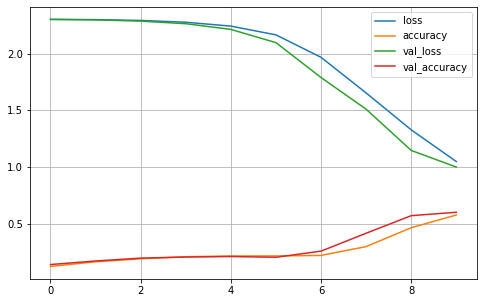

In [5]:
plot_learning_curves(history1)

**Update the model to add a BatchNormalization layer after every hidden layer**

In [6]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model2.add(keras.layers.Dense(100, activation="relu"))
    model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation="softmax"))
model2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history2 = model2.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.8911 - accuracy: 0.3685 - val_loss: 1.0743 - val_accuracy: 0.6232
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 1.1077 - accuracy: 0.6054 - val_loss: 0.8203 - val_accuracy: 0.7020
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9596 - accuracy: 0.6547 - val_loss: 0.7176 - val_accuracy: 0.7344
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8856 - accuracy: 0.6797 - val_loss: 0.6707 - val_accuracy: 0.7566
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.8302 - accuracy: 0.6999 - val_loss: 0.6335 - val_accuracy: 0.7670
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7961 - accuracy: 0.7135 - val_loss: 0.6028 - val_accuracy: 0.7780
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7523 - accuracy: 0.7309 - val_loss: 0.5749 - val_ac

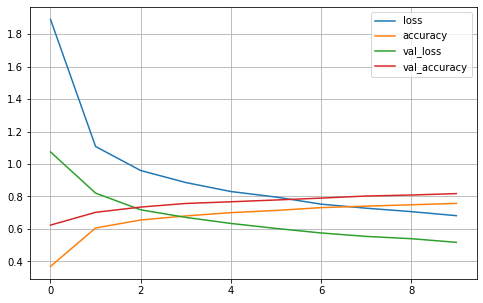

In [7]:
plot_learning_curves(history2)

**Move the BN layers before the hidden layers' activation functions**

In [8]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model3.add(keras.layers.Dense(100))
    model3.add(keras.layers.BatchNormalization())
    model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))
model3.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history3 = model3.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.9591 - accuracy: 0.3196 - val_loss: 1.1704 - val_accuracy: 0.6272
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.1512 - accuracy: 0.6155 - val_loss: 0.7954 - val_accuracy: 0.7206
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9691 - accuracy: 0.6668 - val_loss: 0.6856 - val_accuracy: 0.7576
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8758 - accuracy: 0.7008 - val_loss: 0.6230 - val_accuracy: 0.7834
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8251 - accuracy: 0.7163 - val_loss: 0.5798 - val_accuracy: 0.7946
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7636 - accuracy: 0.7361 - val_loss: 0.5500 - val_accuracy: 0.8042
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7330 - accuracy: 0.7459 - val_loss: 0.5348 - val_ac

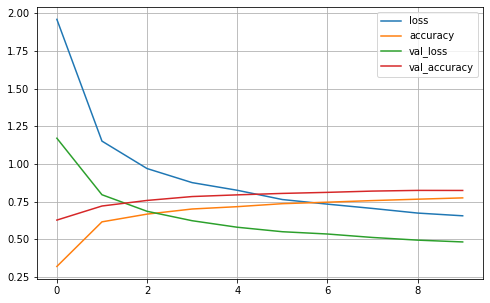

In [9]:
plot_learning_curves(history3)

**Remove all the BN layers, and just use the SELU activation function instead (always use SELU with LeCun Normal weight initialization)**

Notice that you get better performance than with BN but training is much faster.

In [10]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model4.add(keras.layers.Dense(100, activation="selu",
                                  kernel_initializer="lecun_normal"))
model4.add(keras.layers.Dense(10, activation="softmax"))
model4.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history4 = model4.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6455 - accuracy: 0.7713 - val_loss: 0.4780 - val_accuracy: 0.8306
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4497 - accuracy: 0.8378 - val_loss: 0.4216 - val_accuracy: 0.8500
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3995 - accuracy: 0.8551 - val_loss: 0.4049 - val_accuracy: 0.8558
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3693 - accuracy: 0.8653 - val_loss: 0.3851 - val_accuracy: 0.8598
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3472 - accuracy: 0.8739 - val_loss: 0.3745 - val_accuracy: 0.8664
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3292 - accuracy: 0.8801 - val_loss: 0.3662 - val_accuracy: 0.8692
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3141 - accuracy: 0.8861 - val_loss: 0.3709 - val_accuracy:

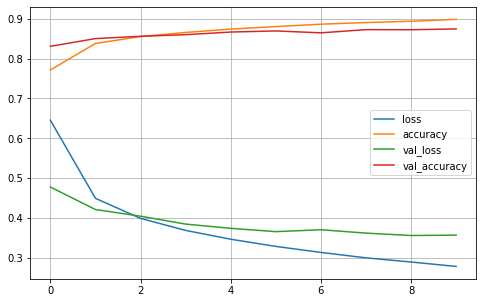

In [11]:
plot_learning_curves(history4)

**Train for 10 additional epochs** 

Notice that the model starts overfitting

In [12]:
history5 = model4.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9021 - val_loss: 0.3564 - val_accuracy: 0.8736
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2601 - accuracy: 0.9053 - val_loss: 0.3577 - val_accuracy: 0.8714
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2510 - accuracy: 0.9079 - val_loss: 0.3561 - val_accuracy: 0.8768
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2435 - accuracy: 0.9104 - val_loss: 0.3536 - val_accuracy: 0.8778
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2359 - accuracy: 0.9137 - val_loss: 0.3570 - val_accuracy: 0.8760
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2287 - accuracy: 0.9168 - val_loss: 0.3610 - val_accuracy: 0.8732
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2216 - accuracy: 0.9194 - val_loss: 0.3555 - val_accuracy:

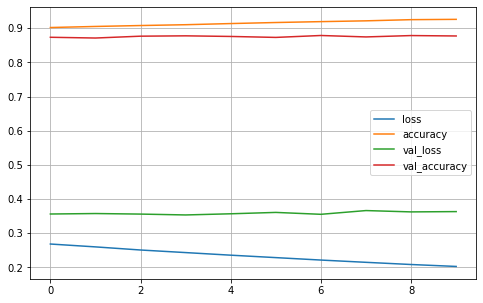

In [13]:
plot_learning_curves(history5)

**Add a Dropout layer (with a 50% dropout rate) just before the output layer to reduce overfitting**

In [14]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model5.add(keras.layers.Dense(100, activation="selu",
                                  kernel_initializer="lecun_normal"))
model5.add(keras.layers.AlphaDropout(rate=0.5))
model5.add(keras.layers.Dense(10, activation="softmax"))
model5.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history6 = model5.fit(X_train_scaled, y_train, epochs=20,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1284 - accuracy: 0.6213 - val_loss: 0.7064 - val_accuracy: 0.8144
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6625 - accuracy: 0.7871 - val_loss: 0.6384 - val_accuracy: 0.8402
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5556 - accuracy: 0.8198 - val_loss: 0.6221 - val_accuracy: 0.8504
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4991 - accuracy: 0.8402 - val_loss: 0.6187 - val_accuracy: 0.8586
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4579 - accuracy: 0.8497 - val_loss: 0.5823 - val_accuracy: 0.8648
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4284 - accuracy: 0.8605 - val_loss: 0.5805 - val_accuracy: 0.8688
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4081 - accuracy: 0.8647 - val_loss: 0.5636 - val_accuracy:

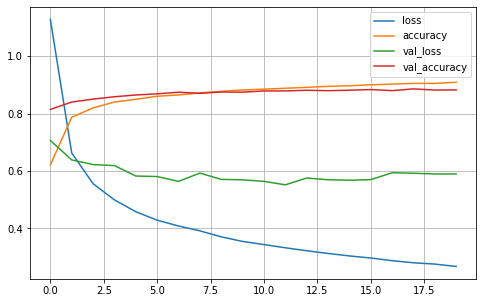

In [15]:
plot_learning_curves(history6)